In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#impoting data
df=pd.read_csv(r"C:\Users\shubh\Downloads\honeyproduction 1998-2021.csv")
df

,State,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,Alabama,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,Arizona,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,Arkansas,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,California,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,Colorado,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998
...,...,...,...,...,...,...,...,...
980,Virginia,6000.0,40,240000.0,79000.0,8.23,1975000.0,2021
981,Washington,96000.0,32,3072000.0,1206000.0,2.52,7741000.0,2021
982,West Virginia,6000.0,43,258000.0,136000.0,4.80,1238000.0,2021
983,Wisconsin,42000.0,47,1974000.0,750000.0,2.81,5547000.0,2021


In [28]:
#checking null values
df.isnull().sum()

State          0
numcol         0
yieldpercol    0
totalprod      0
stocks         0
priceperlb     0
prodvalue      0
year           0
dtype: int64

Q1) How has honey production yield changed from 1998 to 2021?


In [3]:
#grouping the yieldpercol according to year
s=df.groupby('year')['yieldpercol'].sum().reset_index()
s.head()

,year,yieldpercol
0,1998,3008
1,1999,2815
2,2000,2906
3,2001,2840
4,2002,2939


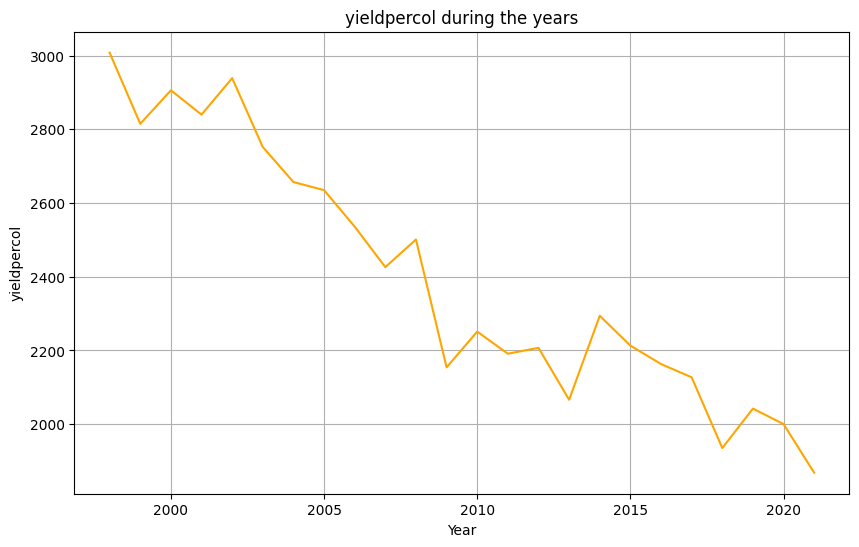

In [31]:
plt.figure(figsize=(10,6))
plt.plot(s['year'],s['yieldpercol'],c='orange')
plt.title('yieldpercol during the years')
plt.xlabel('Year')
plt.ylabel('yieldpercol')
plt.grid()
plt.show()

Q2) Over time, what are the major production trends across the
states?


In [5]:
#groupiong the totalprod accroding to state and year
r=df.groupby(['State','year'])['totalprod'].sum().reset_index()
r.head()

,State,year,totalprod
0,Alabama,1998,1136000.0
1,Alabama,1999,1156000.0
2,Alabama,2000,1248000.0
3,Alabama,2001,1022000.0
4,Alabama,2002,1032000.0


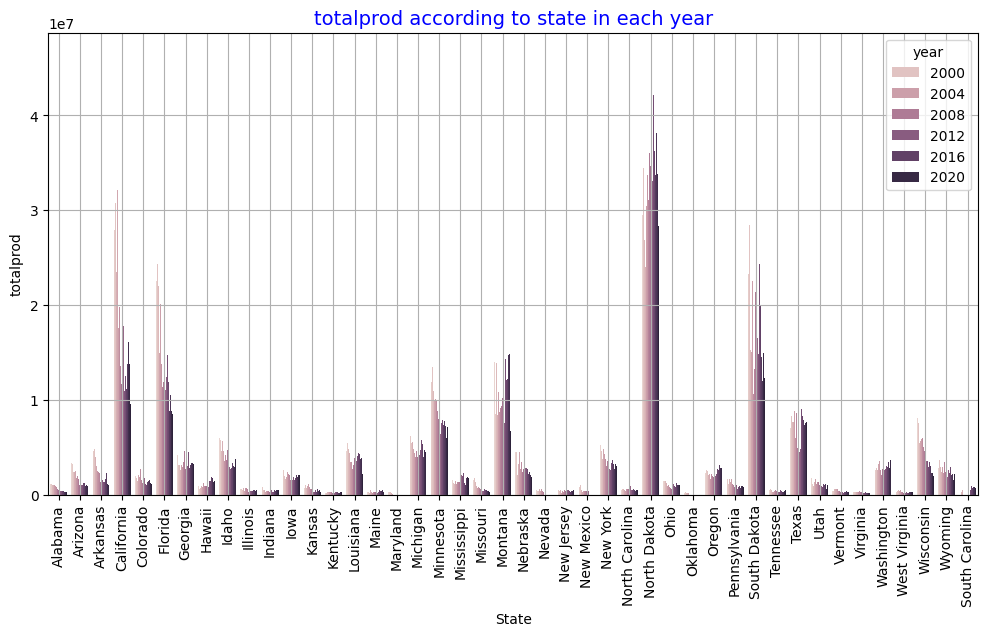

In [6]:
plt.figure(figsize=(12,6))
sns.barplot(df,x='State',y='totalprod',hue='year')
plt.title('totalprod according to state in each year',fontsize=14,color='blue')
plt.xticks(rotation=90)
plt.grid()
plt.show()

Q3) Does the data show any trends in terms of the number of
honey-producing colonies and yield per colony before 2006, which
was when concern over Colony Collapse Disorder spread nationwide?


In [8]:
#filtering data before 2006
df_2006=df[df['year']<2006]
df_2006.head()

,State,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,Alabama,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,Arizona,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,Arkansas,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,California,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,Colorado,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [9]:
#grouping numcol and yieldpercol according to year 
d2=df_2006.groupby('year')[['numcol','yieldpercol']].sum()
d2.head()

,numcol,yieldpercol
year,,
1998,2621000.0,3008
1999,2637000.0,2815
2000,2604000.0,2906
2001,2542000.0,2840
2002,2565000.0,2939


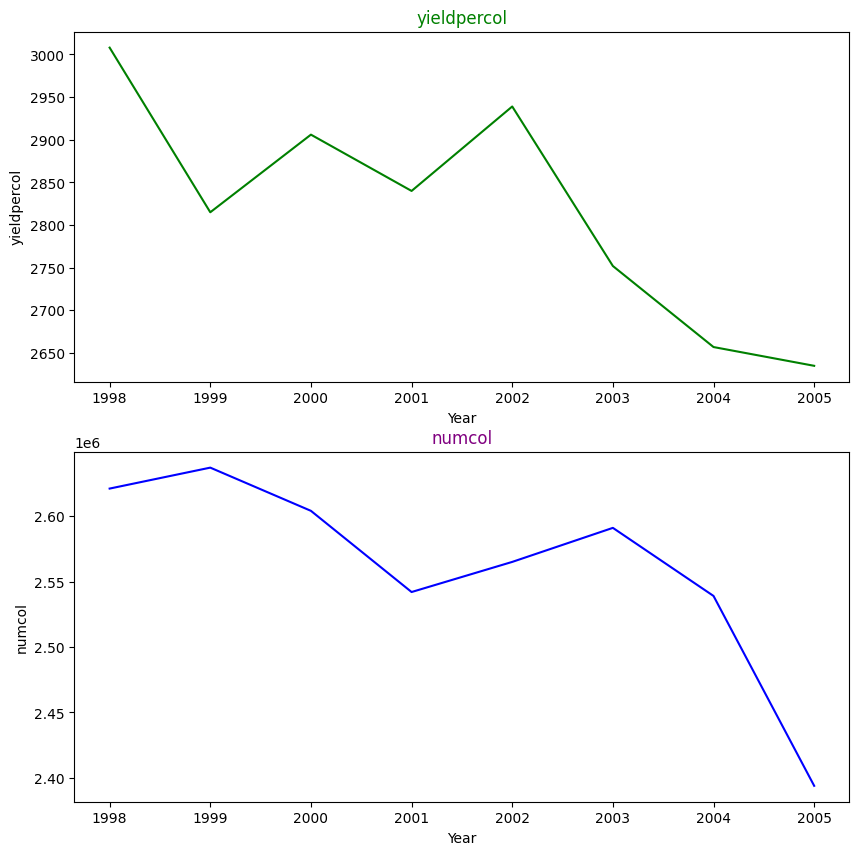

In [12]:
# Create a figure
fig = plt.figure(figsize=(10,10))

# Add the first subplot (upper plot)
ax1 = fig.add_subplot(211)
ax1.plot(d2.index,d2['yieldpercol'],color='green',label='yieldpercol')
ax1.set_title("yieldpercol",color='green')
ax1.set_xlabel('Year')
ax1.set_ylabel('yieldpercol')

# Add the second subplot (lower plot)
ax2 = fig.add_subplot(212)
ax2.plot(d2.index,d2['numcol'],color='blue',label='numcol')
ax2.set_title('numcol',color='purple')
ax2.set_xlabel('Year')
ax2.set_ylabel('numcol')

plt.show()


Q4) Are there any patterns that can be observed between total honey
production and the value of production every year?


In [15]:
corr=df['totalprod'].corr(df['prodvalue'])
corr

0.9007201224627914

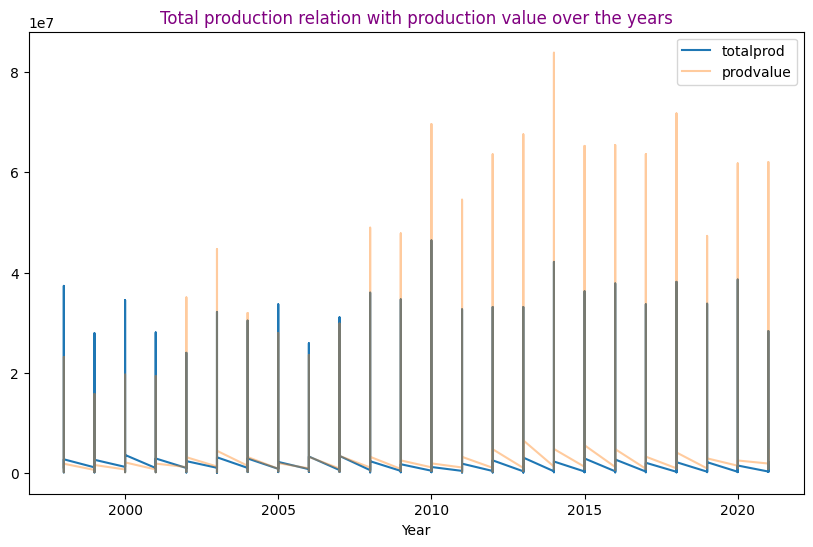

In [27]:
plt.figure(figsize=(10,6))
plt.plot(df['year'],df['totalprod'],label='totalprod')
plt.plot(df['year'],df['prodvalue'],label='prodvalue',alpha=.4)
plt.title('Total production relation with production value over the years',color='purple')
plt.xlabel('Year')
plt.legend()
plt.show()


Q5) How has the value of production, which in some sense could be
tied to demand, changed every year?


In [18]:
#grouping prodvalue according to year
d1=df.groupby('year')['prodvalue'].sum().reset_index()
d1.head()

,year,prodvalue
0,1998,146091000.0
1,1999,123657000.0
2,2000,131568000.0
3,2001,132282000.0
4,2002,227302000.0


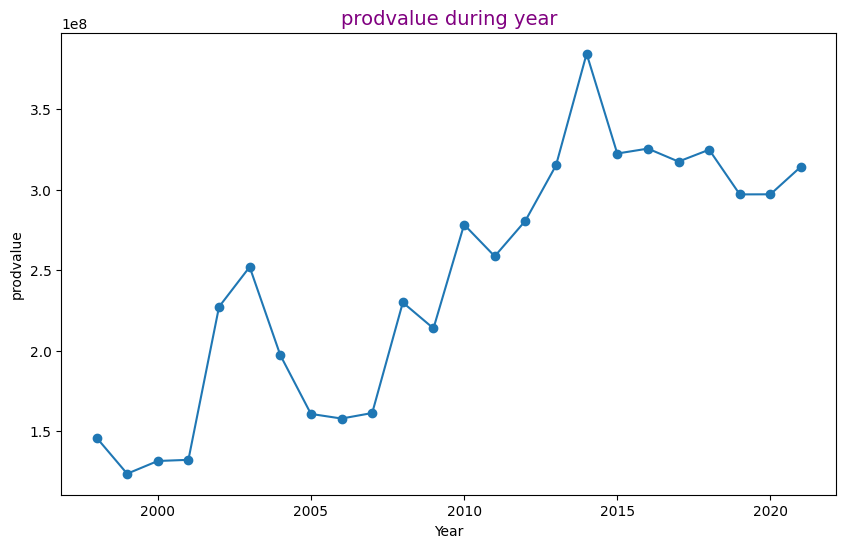

In [32]:
plt.figure(figsize=(10,6))
plt.plot(d1['year'],d1['prodvalue'],marker='o')
plt.title('prodvalue during year',fontsize=14,color='purple')
plt.xlabel('Year')
plt.ylabel('prodvalue')
plt.show()

Q6) Construct the related plots using Seaborn and Matplot apply
customization and derive insights from the visualization.

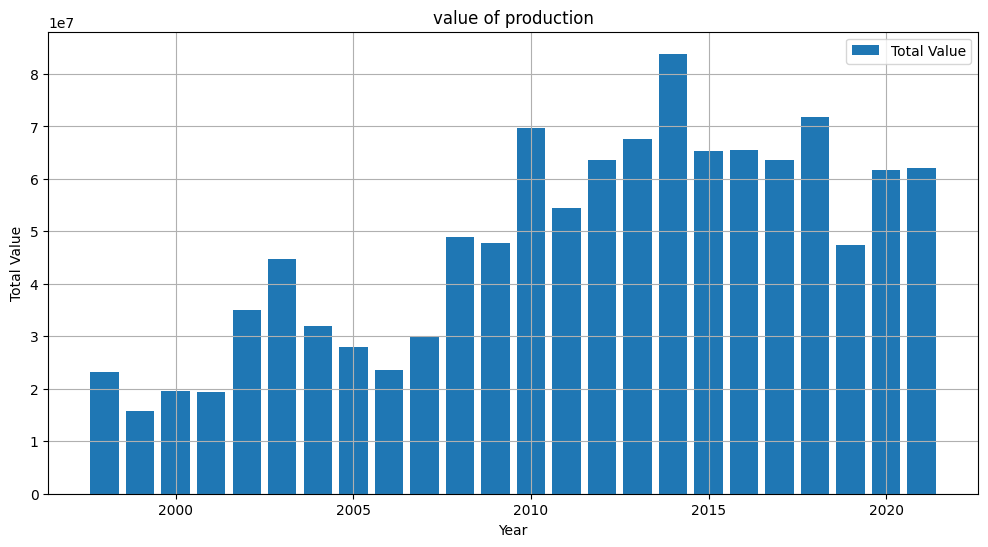

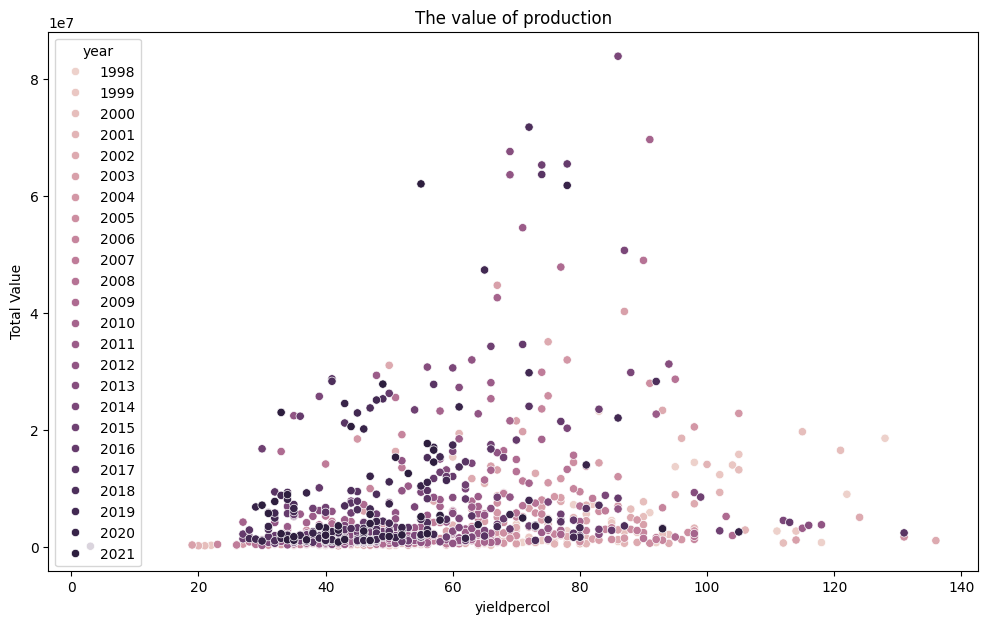

In [34]:
# Provide insight about the trends and relationships within the honey production dataset
df['total_value'] = df['numcol'] * df['yieldpercol'] * df['priceperlb']

# Visualize the line plot using Seaborn
plt.figure(figsize=(12,6))
plt.bar(df['year'], df['total_value'], label='Total Value')
plt.title('value of production')
plt.xlabel('Year')
plt.ylabel('Total Value')
plt.legend()
plt.grid()
plt.show()

# Visualize the scatter plot using Seaborn
plt.figure(figsize=(12,7))
sns.scatterplot(data = df, x = 'yieldpercol', y = 'total_value', hue = 'year' , legend = 'full')
plt.title('The value of production')
plt.xlabel('yieldpercol')
plt.ylabel('Total Value')

plt.show()